# CLustering

<br>
<br>
In this data, we want to cluster each <b>brand</b> by its wheel-base, length, width, height, curb-weight, engine-size, bore, stroke. We want to see if there are any simmiliar feature or difference between these clusters. In this script we will :

1. Do a little data exploration and Data preparation
2. Build clustering models, which is K-MEANS, Hierarchical Clustering, and DBSCAN. Choose which models is the best to cluster 
3. Analyzing the results
<br>
<br>

### 1. EDA and Preparation
<br>
<br>
First we import modules and packages. We use automobile-spec and try to find cluster between its BRAND group. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [201]:
data1=pd.read_csv('dataset/automobile-spec.csv')
data1=data1.groupby('make').mean()
data_c=data1.drop(columns='ID')
data_c.sort_values('price',ascending=False)

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,
jaguar,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,3.600000,3.700000,9.233333,204.666667,4833.333333,14.333333,18.333333,34600.000000
mercedes-benz,110.925000,195.262500,71.062500,55.725000,3696.250000,226.500000,3.605000,3.432500,14.825000,146.250000,4487.500000,18.500000,21.000000,33647.000000
porsche,92.280000,170.260000,67.120000,51.100000,2891.200000,187.200000,3.820000,2.984000,9.600000,210.400000,5790.000000,17.400000,26.000000,31400.500000
bmw,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,3.473750,3.167500,8.575000,138.875000,5068.750000,19.375000,25.375000,26118.750000
volvo,106.481818,188.800000,67.963636,56.236364,3037.909091,142.272727,3.662727,3.147273,10.227273,128.000000,5290.909091,21.181818,25.818182,18063.181818
audi,102.271429,183.828571,68.714286,54.428571,2800.714286,130.714286,3.172857,3.400000,8.400000,121.000000,5500.000000,18.857143,24.142857,17859.166667
mercury,102.700000,178.400000,68.000000,54.800000,2910.000000,140.000000,3.780000,3.120000,8.000000,175.000000,5000.000000,19.000000,24.000000,16503.000000
alfa-romero,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,3.206667,2.943333,9.000000,125.333333,5000.000000,20.333333,26.666667,15498.333333
peugot,110.200000,191.136364,68.390909,57.181818,3221.000000,135.818182,3.582727,3.160000,14.000000,99.818182,4668.181818,22.454545,26.636364,15489.090909


<br>
<br>
We see that there are NaN values. Also we see that if we sorted its data by price, there are some consistent values between brand, that is from up to bottom, some columns tend to decrease. <br>
Because our model has different metrics/unit, we standardize our data (of course after we fill NaN values by its means)

In [203]:
data_b=data_c.fillna(data_c.median())
print(data_b.info())
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
scale2=scale.fit(data_b)
data_s=scale2.transform(data_b)

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, alfa-romero to volvo
Data columns (total 14 columns):
wheel-base           22 non-null float64
length               22 non-null float64
width                22 non-null float64
height               22 non-null float64
curb-weight          22 non-null float64
engine-size          22 non-null float64
bore                 22 non-null float64
stroke               22 non-null float64
compression-ratio    22 non-null float64
horsepower           22 non-null float64
peak-rpm             22 non-null float64
city-mpg             22 non-null float64
highway-mpg          22 non-null float64
price                22 non-null float64
dtypes: float64(14)
memory usage: 2.6+ KB
None


In [202]:
X=np.array(data_s)

<br>
<br>
Now, we ready to dive forward to step 2

### 2. Clustering models

#### K-MEANS

<br>
<br>
Because we must know number of clusters in Kmeans. First we search it by using WSS and Silhouette

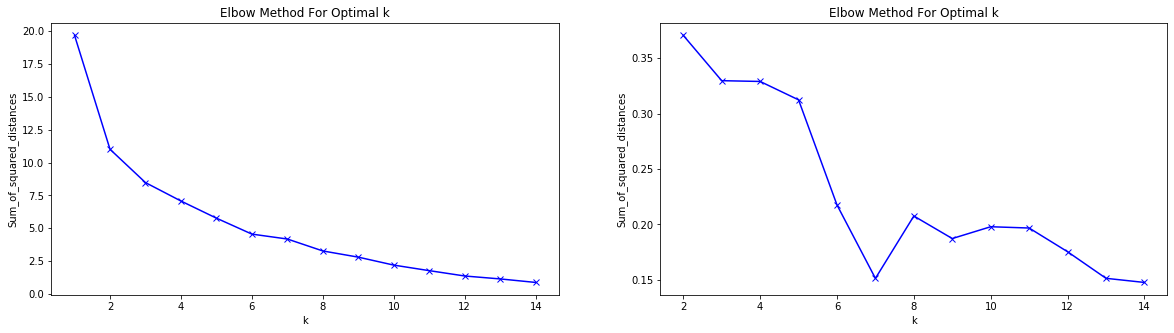

In [204]:
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()


<br>
<br>
It seems that number of cluster 2 is the best cluster because it has the most high score between other number of clusters. Next we want to see how Kmeans cluster our data. Below is how kmeans cluster Wheel-base and width in data.
<br>

silhouette score :  0.37058696161065735


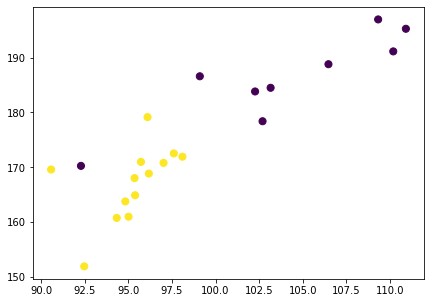

In [207]:
kmeans=KMeans(n_clusters=2)
km=kmeans.fit(X)
pred=km.labels_
center=km.cluster_centers_

print('silhouette score : ',silhouette_score(X,km.labels_))

plt.figure(figsize=(7,5))
plt.scatter(data_b.iloc[:,0], data_b.iloc[:,1],c=pred,alpha=1,s=50)

<br>
<br>
If we use <b>PCA</b> which is variabels reduction to best visualize data, we can use 3d plot or 2d plot. Notes that explained information is how PCA variabels explained our data. For example below, 0.59 means variable one in PCA explained 59% of our data.<br>
Using below plot, we can see that K MEANS can cluster our data realy well, which we can look in 2d plot. if you take x=0, we will have a line that best seperate each observation.

Explained Information :  [0.59691118 0.17010397 0.07701207]


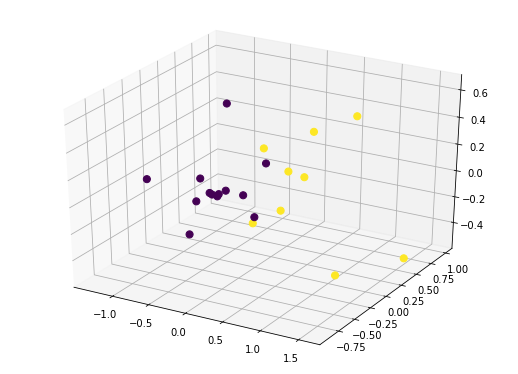

In [145]:
# Visualization using all features by PCA (Variable Reduction)
from mpl_toolkits.mplot3d import axes3d,Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(res[:,0], res[:,1], zs=res[:,2],c=pred,alpha=1,s=50)

Explained Information :  [0.59691118 0.17010397]


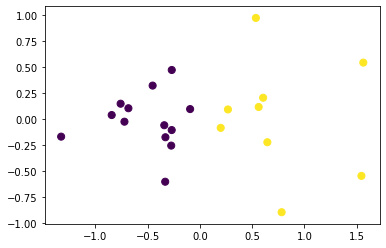

In [146]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)

plt.scatter(res[:,0], res[:,1],c=pred,alpha=1,s=50)
plt.show()

<br>
<br>
Next we use Hierarchical and DBSCAN. 
<br>

# Hierarchical

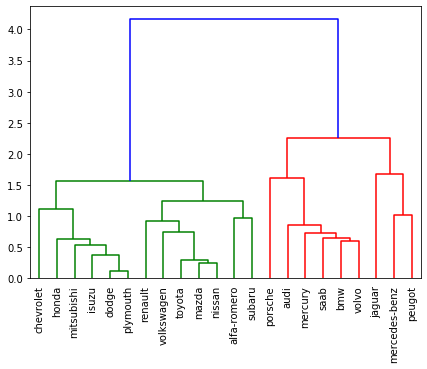

In [219]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(7,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),labels=data_c.index)

plt.xticks(rotation=90,fontsize=10)
plt.show()

<br>
<br>
Using COMPLETE and WARD linkage, we get similiar result. We use ward instead because it has more balance cluster. Also we use 2 cluster, as it is more balanced

In [224]:
# Melakukan fitting hierarchical clustering 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
sill=pd.DataFrame(columns=['cluster','sill'])
link=['single','complete','average','ward']
for i in link:
    model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=i)
    model.fit(X)
    labels = model.labels_
    b = pd.DataFrame([[i,silhouette_score(X,labels)]],columns=['cluster','sill'])
    sill=sill.append(b,ignore_index=True)
sill.sort_values('sill',ascending=False)

,cluster,sill
2,average,0.395533
3,ward,0.370587
0,single,0.359686
1,complete,0.338404


<br>
<br>
Even if average has more sill, we still chose ward as it is more balanced.
<br>
<br>

0.37058696161065735
Explained Information :  [0.59691118 0.17010397 0.07701207]


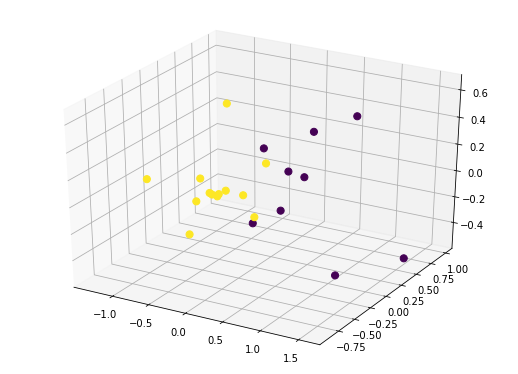

In [225]:
from sklearn.decomposition import PCA


hir=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
mod=hir.fit(X)
pred=mod.labels_
print(silhouette_score(X,mod.labels_))

pca = PCA(n_components=3)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)


fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(res[:,0], res[:,1], zs=res[:,2],c=pred,s=50,alpha=1)
plt.show()

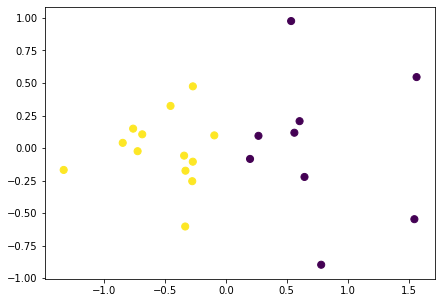

In [227]:
from sklearn.decomposition import PCA

hir=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
mod=hir.fit(X)
pred=mod.labels_

pca = PCA(n_components=2)
res = pca.fit_transform(X)

fig = plt.figure(figsize=(7,5))

plt.scatter(res[:,0], res[:,1],c=pred,s=50)
plt.show()

<br>
<br>
Hierarchical and KMEANS has similiar sill and cluster result. 

### DBSCAN

In [152]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

0.16438898962254006


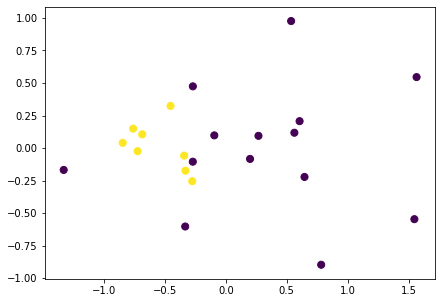

In [228]:
from sklearn.decomposition import PCA

dbscan = DBSCAN(eps=0.55,min_samples=3)
mod = dbscan.fit(X)
pred=mod.labels_
print(silhouette_score(X,mod.labels_))

pca = PCA(n_components=2)
res = pca.fit_transform(X)


fig = plt.figure(figsize=(7,5))
plt.scatter(res[:,0], res[:,1],c=pred,s=50)
plt.show()

<br>
<br>
DBSCAN so far is the worst silouehete cluster compared to others. also it has imbalanced number of obs in cluster. so, we still chose Kmeans or Hierarchical Clustering. For simplicity, we use KMEANS as it is more faster to compute

# WE CHOOSE K-means 
<br>
<br>

### 3. Analysis MODEL

silhouete_score :  0.37058696161065735
Explained Information :  [0.59691118 0.17010397]


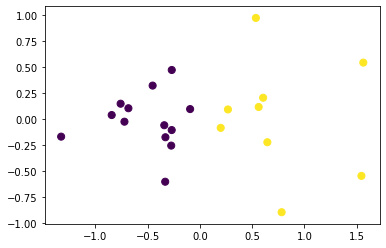

In [229]:
kmeans=KMeans(n_clusters=2)
km=kmeans.fit(X)
pred=km.labels_
center=km.cluster_centers_

print('silhouete_score : ',silhouette_score(X,km.labels_))
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)

plt.scatter(res[:,0], res[:,1],c=pred,alpha=1,s=50)
plt.show()

In [234]:
grup1=data_c.iloc[pred==0,:]
grup2=data_c.iloc[pred==1,:]


<br>
<br>
Cluster 1 or grup1 has alfa romeo, chevrolet and others. Cluster 2 or grup2 has AUDI, BMW jaguar and others. We see that mostly, cluster 2 is what they say "Expensive" brand like BMW, JAGUAR, Mercedes-BENZ and others. It make sense that it grouped into one cluster. 

In [235]:
grup1.index

Index(['alfa-romero', 'chevrolet', 'dodge', 'honda', 'isuzu', 'mazda',
       'mitsubishi', 'nissan', 'plymouth', 'renault', 'subaru', 'toyota',
       'volkswagen'],
      dtype='object', name='make')

In [236]:
grup2.index

Index(['audi', 'bmw', 'jaguar', 'mercedes-benz', 'mercury', 'peugot',
       'porsche', 'saab', 'volvo'],
      dtype='object', name='make')

In [237]:
grup1

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,
alfa-romero,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,3.206667,2.943333,9.000000,125.333333,5000.000000,20.333333,26.666667,15498.333333
chevrolet,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,9.566667,62.666667,5300.000000,41.000000,46.333333,6007.000000
dodge,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,3.094444,3.365556,8.634444,86.333333,5388.888889,28.000000,34.111111,7875.444444
honda,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,9.215385,80.230769,5753.846154,30.384615,35.461538,8184.692308
isuzu,94.825000,163.775000,63.550000,52.225000,2213.500000,102.500000,3.200000,3.170000,9.225000,77.000000,5150.000000,31.000000,36.000000,8916.500000
mazda,97.017647,170.805882,65.588235,53.358824,2297.823529,103.000000,3.286923,3.299231,10.488235,85.529412,5108.823529,25.705882,31.941176,10652.882353
mitsubishi,95.353846,168.030769,65.253846,50.692308,2381.923077,118.307692,3.250769,3.493846,8.061538,104.076923,5269.230769,24.923077,31.153846,9239.769231
nissan,95.722222,170.988889,65.088889,53.633333,2400.388889,127.888889,3.254444,3.313333,9.794444,102.555556,5177.777778,27.000000,32.944444,10415.666667
plymouth,95.385714,164.900000,64.271429,51.971429,2220.857143,106.285714,3.121429,3.375714,8.671429,86.714286,5357.142857,28.142857,34.142857,7963.428571


In [238]:
grup2

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,
audi,102.271429,183.828571,68.714286,54.428571,2800.714286,130.714286,3.172857,3.400000,8.400000,121.000000,5500.000000,18.857143,24.142857,17859.166667
bmw,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,3.473750,3.167500,8.575000,138.875000,5068.750000,19.375000,25.375000,26118.750000
jaguar,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,3.600000,3.700000,9.233333,204.666667,4833.333333,14.333333,18.333333,34600.000000
mercedes-benz,110.925000,195.262500,71.062500,55.725000,3696.250000,226.500000,3.605000,3.432500,14.825000,146.250000,4487.500000,18.500000,21.000000,33647.000000
mercury,102.700000,178.400000,68.000000,54.800000,2910.000000,140.000000,3.780000,3.120000,8.000000,175.000000,5000.000000,19.000000,24.000000,16503.000000
peugot,110.200000,191.136364,68.390909,57.181818,3221.000000,135.818182,3.582727,3.160000,14.000000,99.818182,4668.181818,22.454545,26.636364,15489.090909
porsche,92.280000,170.260000,67.120000,51.100000,2891.200000,187.200000,3.820000,2.984000,9.600000,210.400000,5790.000000,17.400000,26.000000,31400.500000
saab,99.100000,186.600000,66.500000,56.100000,2745.500000,121.000000,3.373333,2.903333,9.201667,126.666667,5333.333333,20.333333,27.333333,15223.333333
volvo,106.481818,188.800000,67.963636,56.236364,3037.909091,142.272727,3.662727,3.147273,10.227273,128.000000,5290.909091,21.181818,25.818182,18063.181818


In [231]:
grup1.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,13.000000,13.000000
mean,95.282008,167.251387,64.736741,52.666847,2290.713253,110.982243,3.224324,3.282948,9.549187,89.212905,5191.187637,27.838956,33.717530,9450.252262
std,2.029098,6.832579,1.018787,1.390397,218.567461,15.461211,0.171759,0.302816,1.407629,15.822574,257.794407,4.884038,4.528365,2214.827030
min,90.566667,151.933333,62.500000,50.000000,1757.000000,80.333333,2.990000,2.616667,8.061538,62.666667,4775.000000,20.333333,26.666667,6007.000000
25%,94.825000,163.775000,64.271429,51.971429,2213.500000,102.666667,3.121429,3.170000,8.700000,80.870192,5081.617647,25.705882,31.153846,8184.692308
50%,95.385714,168.858333,64.950000,52.850000,2316.250000,107.083333,3.206667,3.313333,9.215385,86.291667,5165.972222,27.500000,32.944444,9239.769231
75%,96.175000,170.988889,65.253846,53.633333,2400.388889,118.812500,3.280000,3.400000,9.794444,95.224826,5314.285714,28.583333,34.916667,10077.500000
max,98.103125,179.150000,66.550000,55.183333,2639.666667,137.333333,3.620000,3.900000,13.625000,125.333333,5753.846154,41.000000,46.333333,15498.333333


In [232]:
grup2.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,104.050453,186.194900,68.239963,54.614454,3139.920190,170.116318,3.563377,3.223845,10.229141,150.075168,5108.000842,19.048353,24.293230,23211.558081
std,5.997128,8.312451,1.525320,2.157690,439.270330,53.064125,0.200859,0.246334,2.470715,38.384634,413.842583,2.323784,2.907224,8198.417906
min,92.280000,170.260000,66.475000,51.100000,2745.500000,121.000000,3.172857,2.903333,8.000000,99.818182,4487.500000,14.333333,18.333333,15223.333333
25%,102.271429,183.828571,67.120000,54.428571,2891.200000,135.818182,3.473750,3.120000,8.575000,126.666667,4833.333333,18.500000,24.000000,16503.000000
50%,103.162500,186.600000,68.000000,54.825000,2929.375000,142.272727,3.600000,3.160000,9.233333,138.875000,5068.750000,19.000000,25.375000,18063.181818
75%,109.333333,191.136364,68.714286,56.100000,3221.000000,187.200000,3.662727,3.400000,10.227273,175.000000,5333.333333,20.333333,26.000000,31400.500000
max,110.925000,196.966667,71.062500,57.181818,4027.333333,280.666667,3.820000,3.700000,14.825000,210.400000,5790.000000,22.454545,27.333333,34600.000000


In [233]:
compar=pd.DataFrame()
compar=grup2.describe()-grup1.describe()
compar

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000e+00,-4.000000,-3.000000,-3.000000,-4.000000,-4.000000,-4.000000
mean,8.768446,18.943513,3.503221,1.947607,849.206937,59.134075,0.339053,-5.910266e-02,0.679954,60.862263,-83.186795,-8.790604,-9.424300,13761.305819
std,3.968030,1.479872,0.506533,0.767293,220.702869,37.602913,0.029100,-5.648271e-02,1.063086,22.562060,156.048176,-2.560254,-1.621141,5983.590876
min,1.713333,18.326667,3.975000,1.100000,988.500000,40.666667,0.182857,2.866667e-01,-0.061538,37.151515,-287.500000,-6.000000,-8.333333,9216.333333
25%,7.446429,20.053571,2.848571,2.457143,677.700000,33.151515,0.352321,-5.000000e-02,-0.125000,45.796474,-248.284314,-7.205882,-7.153846,8318.307692
50%,7.776786,17.741667,3.050000,1.975000,613.125000,35.189394,0.393333,-1.533333e-01,0.017949,52.583333,-97.222222,-8.500000,-7.569444,8823.412587
75%,13.158333,20.147475,3.460440,2.466667,820.611111,68.387500,0.382727,4.440892e-16,0.432828,79.775174,19.047619,-8.250000,-8.916667,21323.000000
max,12.821875,17.816667,4.512500,1.998485,1387.666667,143.333333,0.200000,-2.000000e-01,1.200000,85.066667,36.153846,-18.545455,-19.000000,19101.666667


<br>
<br>
Here we grup each cluster 1 to 2 and see its statistic descriptive. Also, we see in above table, negative means cluster1 descriptive has more values than cluster2. For example in price, we see that mostly, group 2 has more price than grup1.It make sense because grup2 is "expensive" cars. Also we see that mpg, grup2 has lower value, meaning that grup2 has more ineffective miles per galon compared to grup1, which is mostly expensive car do. From above we see the properties of each group.

### CONCLUSION

<br>
<br>
Using our data, KMEANS is quiet good to cluster our data into 2 grup. Grup2, or Cluster 2 is group of "expensive" car like JAGUAR, BMW, PORSCHE. Grup1 or cluster1 is "normal" car like toyota, honda and others. Also in this group2, we can see comparable of each features in the last table.

# CREATED BY

## ANDREAS MULYA RAHARDJA